In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [2]:
data = pd.read_csv("C:\\Users\\manideepreddy\\OneDrive\\Desktop\\MY DATASETS\\salary positions.csv")

In [10]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
data.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


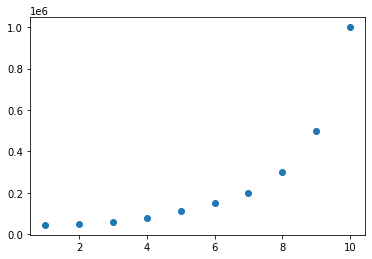

In [12]:
plt.scatter(data["Level"],data["Salary"])

In [13]:
x = data["Level"]
y = data["Salary"]

In [14]:
x.head()

0    1
1    2
2    3
3    4
4    5
Name: Level, dtype: int64

In [15]:
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [43]:
x = np.array(x).reshape(-1,1)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [45]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8, 1) (2, 1) (8, 1) (2, 1)


In [63]:
x_test

array([[9],
       [3]], dtype=int64)

In [46]:
linear = LinearRegression()

In [47]:
linear.fit(x_train,y_train)

LinearRegression()

In [78]:
linpred = linear.predict(x_test)
linpred

array([[543473.58121331],
       [ 44275.9295499 ]])

In [79]:
y_test

array([[500000],
       [ 60000]], dtype=int64)

In [82]:
r2_score(linpred,y_test)

0.982847405505933

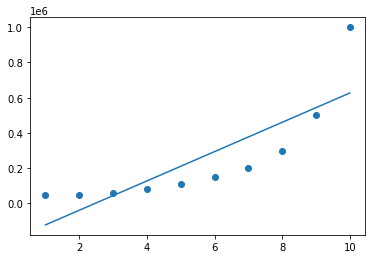

In [83]:
plt.scatter(data["Level"],data["Salary"])
plt.plot(x,linear.predict(x))

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [85]:
polypred = lin_reg_2.predict(poly_reg.fit_transform(x_test))

In [86]:
r2_score(polypred,y_test)

0.9925301784452991

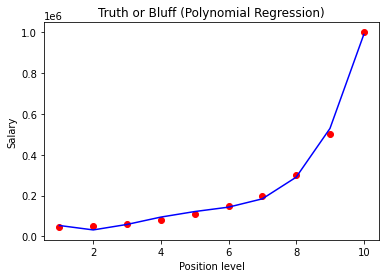

In [87]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()